In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc
from dash import html
from dash import Input, Output
import plotly.express as px
import numpy as np

C:\Users\mohan\AppData\Local\Temp\ipykernel_20628\3485943175.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('https://www.dubaipulse.gov.ae/dataset/c9263194-5ee3-4340-b7c0-3269b26acb43/resource/c3ece154-3071-4116-8650-e769d8416d88/download/traffic_incidents.csv')
df.head(5)

,acci_id,acci_time,acci_name,acci_x,acci_y
0,4530755951,29/05/2024 00:14:01,الوقوف خلف المركبات (دبل بارك) - بسيط,25.031110,55.261390
1,4530775314,29/05/2024 00:53:08,الوقوف خلف المركبات (دبل بارك) - بسيط,25.230950,55.282040
2,4530786018,29/05/2024 01:13:30,مركبه عطلانه في الشارع - بسيط,25.135277,55.215557
3,4530784863,29/05/2024 01:13:57,عبور شخص أو عدة أشخاص من مكان غير مخصص لعبور ا...,25.115185,55.213240
4,4530787317,29/05/2024 01:13:57,عبور شخص أو عدة أشخاص من مكان غير مخصص لعبور ا...,25.116435,55.211444


In [3]:
df['severity'] = df['acci_name'].str.split('-').str[1] # extract accident severity from accident time column

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,acci_id,acci_time,acci_name,acci_x,acci_y,severity
0,4530755951,29/05/2024 00:14:01,الوقوف خلف المركبات (دبل بارك) - بسيط,25.031110,55.261390,بسيط
1,4530775314,29/05/2024 00:53:08,الوقوف خلف المركبات (دبل بارك) - بسيط,25.230950,55.282040,بسيط
2,4530786018,29/05/2024 01:13:30,مركبه عطلانه في الشارع - بسيط,25.135277,55.215557,بسيط
5,4530785489,29/05/2024 01:15:40,الوقوف خلف المركبات (دبل بارك) - بسيط,25.216810,55.419845,بسيط
6,4530791317,29/05/2024 01:26:58,صدم رصيف - بسيط,25.073870,55.142020,بسيط


In [6]:
# Cleaning data and creating GeoDataFrame
df['acci_time'] = pd.to_datetime(df['acci_time'], dayfirst=True)
df['hour'] = df['acci_time'].dt.hour
df['day_of_week'] = df['acci_time'].dt.day_name()
df['year'] = df['acci_time'].dt.year
df['month'] = df['acci_time'].dt.month
df['day'] = df['acci_time'].dt.day
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.acci_y, df.acci_x))

In [7]:
gdf.head()

,acci_id,acci_time,acci_name,acci_x,acci_y,severity,hour,day_of_week,year,month,day,geometry
0,4530755951,2024-05-29 00:14:01,الوقوف خلف المركبات (دبل بارك) - بسيط,25.031110,55.261390,بسيط,0,Wednesday,2024,5,29,POINT (55.26139 25.03111)
1,4530775314,2024-05-29 00:53:08,الوقوف خلف المركبات (دبل بارك) - بسيط,25.230950,55.282040,بسيط,0,Wednesday,2024,5,29,POINT (55.28204 25.23095)
2,4530786018,2024-05-29 01:13:30,مركبه عطلانه في الشارع - بسيط,25.135277,55.215557,بسيط,1,Wednesday,2024,5,29,POINT (55.21556 25.13528)
5,4530785489,2024-05-29 01:15:40,الوقوف خلف المركبات (دبل بارك) - بسيط,25.216810,55.419845,بسيط,1,Wednesday,2024,5,29,POINT (55.41985 25.21681)
6,4530791317,2024-05-29 01:26:58,صدم رصيف - بسيط,25.073870,55.142020,بسيط,1,Wednesday,2024,5,29,POINT (55.14202 25.07387)


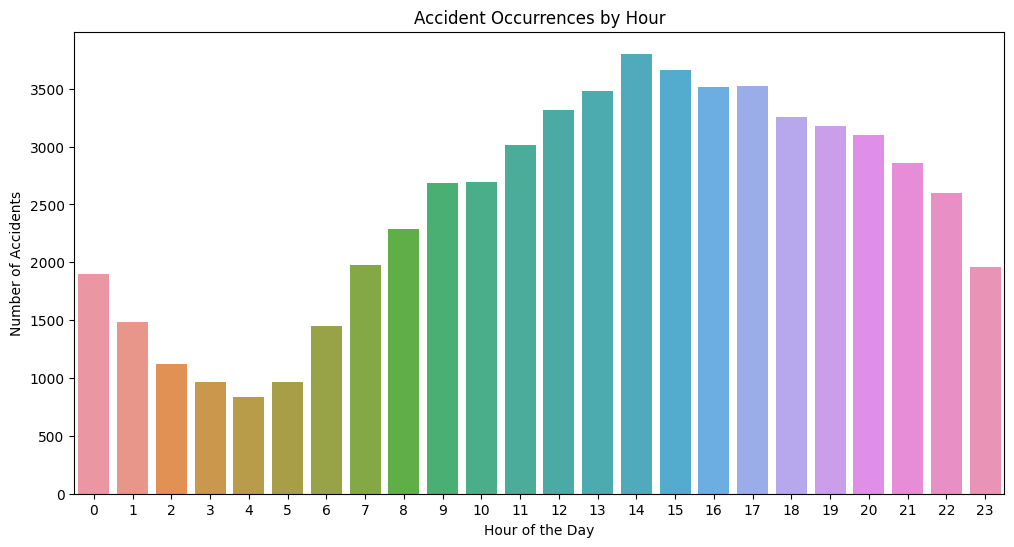

In [8]:
#overall plot of number of accidents per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df)
plt.title('Accident Occurrences by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

# An interactive dashboard to visualize accidents by time of day, month, and severity

In [9]:
    past_week = df['acci_time'].dt.strftime('%Y-%m-%d').unique()[0:7]

In [11]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Traffic Accidents Dashboard"),
    
    dcc.Dropdown(
        id='time-period',
        options=[
            {'label': 'Morning (6am - 12pm)', 'value': 'morning'},
            {'label': 'Afternoon (12pm - 6pm)', 'value': 'afternoon'},
            {'label': 'Evening (6pm - 12am)', 'value': 'evening'},
            {'label': 'Night (12am - 6am)', 'value': 'night'},
        ],
        value=['morning', 'afternoon', 'evening', 'night'],
        multi=True,
        placeholder="Select time period(s)"
    ),
    
    dcc.Dropdown(
        id='severity',
        options=[
            {'label': 'Low Severity', 'value': ' Low'},
            {'label': 'High Severity', 'value': ' High'},
            {'label': 'Both', 'value': 'both'}
        ],
        value='both',
        placeholder="Select severity"
    ),
    
    dcc.Dropdown(
        id='month-year',
        multi=True,
        placeholder="Select month(s) and year(s)"
    ),
    dcc.Checklist(
        id='past-week-checkbox',
        options=[{'label': 'Show past week data', 'value': 'show_past_week'}],
        value=[]
    ),
    
    dcc.Graph(id='map-graph')
])

@app.callback(
    Output('month-year', 'options'),
    [Input('time-period', 'value'),
     Input('severity', 'value')]
)
def populate_month_year_dropdown(time_periods, severity):
    # Filter DataFrame based on selected time periods
    filtered_df = df[df['hour'].isin(get_hours_for_time_periods(time_periods))]
    
    # Filter DataFrame based on selected severity
    if severity != 'both':
        filtered_df = filtered_df[filtered_df['severity'] == severity]
    

    unique_years_months = filtered_df['acci_time'].dt.strftime('%Y-%m').unique()

    
    # Generate unique options for dropdown
    options = [{'label': f"{ym}", 'value': f"{ym}"} for ym in unique_years_months]
    return options

@app.callback(
    Output('map-graph', 'figure'),
    [Input('time-period', 'value'),
     Input('severity', 'value'),
     Input('month-year', 'value'),
     Input('past-week-checkbox', 'value')]
)
def update_map(time_periods, severity, month_years, past_week_checkbox):

    filtered_df = df[df['hour'].isin(get_hours_for_time_periods(time_periods))]

    if severity != 'both':
        filtered_df = filtered_df[filtered_df['severity'] == severity]
    
    if month_years:
        filtered_df = filtered_df[filtered_df['acci_time'].dt.strftime('%Y-%m').isin(month_years)]
    
    if 'show_past_week' in past_week_checkbox:
        latest_date = df['acci_time'].max()
        past_week_date = latest_date - pd.Timedelta(days=7)
        filtered_df = filtered_df[filtered_df['acci_time'] >= past_week_date]
    
    fig = px.scatter_mapbox(filtered_df, lat='acci_x', lon='acci_y', color='severity',
                            mapbox_style="carto-positron", zoom=10, hover_data={'day': True,
                                                                                'month': True,
                                                                                'year': True,
                                                                                'acci_x': False,
                                                                                'acci_y': False})
    
    return fig

def get_hours_for_time_periods(time_periods):
    hours = []
    if 'morning' in time_periods:
        hours += list(range(6, 12))
    if 'afternoon' in time_periods:
        hours += list(range(12, 18))
    if 'evening' in time_periods:
        hours += list(range(18, 24))
    if 'night' in time_periods:
        hours += list(range(0, 6))
    return hours

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\mohan\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

